# Homework 1 – Data Access Notebook
**Author:** Johanna Kasischke  
**Course:** ESDP  
**Due Date:** 04.12.2025

This notebook demonstrates how to access and download NOAA NESDIS SST14NA data, estimate the data volume, and open the NetCDF file for analysis.

## NESDIS 14 km sea surface temperature for North America, 1993 to 2016

CLASS (Comprehensive Large Array-data Stewardship System) is an electronic library of NOAA environmental data. This website provides the data from the POES (Polar Orbiting Operational Environmental Satellite) and GOES (Geostationary Operational Environmental Satellite) satellite programmes (https://ospo.noaa.gov/resources/data-access/).
The National Oceanic and Atmospheric Administration (NOAA) is the United States' federal agency for oceanic and atmospheric research. The dataset used was distributed by the National Environmental Satellite, Data and Information Service (NESDIS). This organisation operates and manages US satellite services. One of its tasks is to monitor environmental conditions on a daily, weekly, seasonal and yearly basis. 

## Introduction to dataset

This task uses a dataset titled 'NESDIS 14 km sea surface temperature for North America, 1993 to 2016'. It shows sea surface temperatures in degrees Celsius. Sea surface temperature (SST) is the temperature of the ocean's surface water. The time period of interest is the Atlantic hurricane season, from 8 June 2025 to 6 January 2006, because SST has a significant impact on hurricane development.

## How to download the data

The data can be downloaded from the NOAA Comprehensive Large Array-data Stewardship System (CLASS), which is an electronic library of NOAA environmental data.

The NESDIS SST14NA dataset was accessed via: https://www.aev.class.noaa.gov/saa/products/welcome. The following steps need to be followed to download the data:
1. Navigate to the portal and select "Sea surface temperature (14 km North America)" either at the top search bar or on the right-hand side of the website.
2. Specify the temporal range (here: June 8 2005 till January 6 2006).
3. Choose output format (NetCDF preferred). Other options include ASCII, GIF, spreadsheet, tab-delimited or CSV.
4. Select the distributed variable (SST).
5. Initiate the search --> the server retrieves the specific data
6. The download starts by itself.

*Citation of the dataset:*
NOAA/NESDIS Office of Satellite Data Processing and Distribution (2013). NESDIS 14 km sea surface temperature for North America, 1993 to 2016. Data used from 2005-06-08 until 2006-01-06. NOAA National Centers for Environmental Information. Dataset. https://www.ncei.noaa.gov/archive/accession/OSDPD-SST-14km-NorthAmerica. Accessed 30th of November 2025.

### Estimate of data volume for download

- spatial domain: North America ((-140° W, -50° E, 15° S, 60° N)
- Spatial resolution: 14 km
- Pixel resolution: .125 x .125 degrees
- Time range: 8th of June, 2025 until 6th of January, 2006 (Atlantic Hurricane Season of 2005)
- Time resolution: 48 h

In [13]:
import datetime
import math
import numpy as np


# Here, you can change the parameters for specific data set and then compute the approximate download volume.

spatial_resolution = 14 # [km]
degree_resolution = 0.125 # The pixel resolution is .125 x .125 degrees. 
lat_min, lat_max = -15, 60
lon_min, lon_max = -140, -50
date_start = datetime.date(2005, 6, 8)
date_end = datetime.date(2006, 1, 6)
time_step = 2 # equals the 48 h time resolution
bytes = 4 # assume 4 bytes/value

In [14]:
days = (date_end - date_start).days
steps = days / time_step + 1

degree_to_km = 111.32 # approx. km per degree latitude

cell_height = (lat_max - lat_min) * degree_to_km

# for approximating the download size, the latitude will be approximated for the whole calculation (-> longitude distance varies with latitude)
lat_mean = (lat_min + lat_max) / 2
lon_per_degree = degree_to_km * math.cos(math.radians(lat_mean)) # in km
cell_width = (lon_max - lon_min) * lon_per_degree

# calculate grid size
nx = (cell_width / spatial_resolution)
ny = (cell_height / spatial_resolution)
pixels = nx * ny

# with pixel resolution
nx_p = (lon_max - lon_min) / degree_resolution
ny_p = (lat_max - lat_min) / degree_resolution
pixels_p = nx_p * ny_p


# compute total bytes with spatial resolution
total_bytes = pixels * bytes * steps
total_mb = total_bytes / 1e6


# compute total bytes with pixel resolution
total_bytes_p = pixels_p * bytes * steps
total_mb_p = total_bytes_p / 1e6


########## PRINT SOLUTION #############
print("For calculation with spatial resolution, the estimated download volume will be: ", np.round(total_mb), "mb")
print("For calculation with pixel resolution, the estimated download volume will be: ", np.round(total_mb_p), "mb")


For calculation with spatial resolution, the estimated download volume will be:  169.0 mb
For calculation with pixel resolution, the estimated download volume will be:  185.0 mb


Note that the estimated and real data volumes don't match. This might be due to the data stored as netCDF. 

## Download and import the data

In [15]:
# import modules
import xarray as xr

In [23]:
# upload file into ipynb
files = ["2005-06-08_00_00_00_2006-01-06_23_59_59-SST14NA-anal_temp-15_60_220_310-.5.NETCDF"]

# open the file in xarray
datasets = []
for file in files:
    ds = xr.open_dataset(file)
    print(ds)
    datasets.append(ds)
try:
    ds = xr.open_dataset(file)
    print("\nDataset opened successfully")
except Exception as e:
    print("Error opening dataset:", e)


<xarray.Dataset>
Dimensions:     (AX005: 226, LAT: 361, TIME1: 107, bnds: 2)
Coordinates:
  * AX005       (AX005) float64 220.0 220.4 220.8 221.2 ... 309.2 309.6 310.0
  * LAT         (LAT) float32 15.0 15.12 15.25 15.38 ... 59.62 59.75 59.88 60.0
  * TIME1       (TIME1) datetime64[ns] 2005-06-09 2005-06-11 ... 2006-01-06
Dimensions without coordinates: bnds
Data variables:
    TIME1_bnds  (TIME1, bnds) datetime64[ns] ...
    ANAL_TEMP   (TIME1, LAT, AX005) float32 ...
Attributes:
    history:      FERRET V6.96   30-Nov-25
    Conventions:  CF-1.6

Dataset opened successfully


/srv/conda3/envs/py39-cartopy/lib/python3.9/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'ANAL_TEMP' has multiple fill values {9999.0, 999.9}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/srv/conda3/envs/py39-cartopy/lib/python3.9/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'ANAL_TEMP' has multiple fill values {9999.0, 999.9}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


#### Verify download
In order to verify that each dataset has been successfully downloaded, the length of one array and the expected time steps will be compared. The estimation of the download volume was achieved through the computation of time steps. The following Python code verifies that each dataset has been downloaded. Therefore the length of the datetime array and the number of time steps must be equal.

In [ ]:
len(ds["TIME1_bnds"].values)

Frozen({'AX005': <xarray.IndexVariable 'AX005' (AX005: 226)>
array([220. , 220.4, 220.8, ..., 309.2, 309.6, 310. ])
Attributes:
    units:          degrees_east
    point_spacing:  even
    axis:           X
    standard_name:  longitude, 'LAT': <xarray.IndexVariable 'LAT' (LAT: 361)>
array([15.   , 15.125, 15.25 , ..., 59.75 , 59.875, 60.   ], dtype=float32)
Attributes:
    long_name:      Latitude
    units:          degrees_north
    point_spacing:  even
    axis:           Y
    standard_name:  latitude, 'TIME1': <xarray.IndexVariable 'TIME1' (TIME1: 107)>
array(['2005-06-09T00:00:00.000000000', '2005-06-11T00:00:00.000000000',
       '2005-06-13T00:00:00.000000000', '2005-06-15T00:00:00.000000000',
       '2005-06-17T00:00:00.000000000', '2005-06-19T00:00:00.000000000',
       '2005-06-21T00:00:00.000000000', '2005-06-23T00:00:00.000000000',
       '2005-06-25T00:00:00.000000000', '2005-06-27T00:00:00.000000000',
       '2005-06-29T00:00:00.000000000', '2005-07-01T00:00:00.0000000

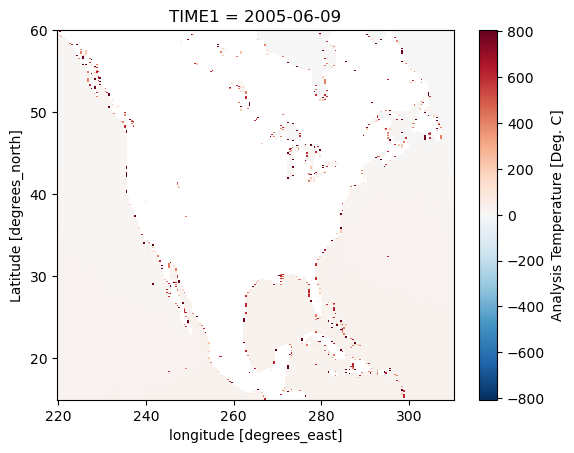

In [20]:
# Inspect variables and dimensions
print(ds.variables)
print(ds.dims)

# Take a quick look at SST values
sst = ds['ANAL_TEMP']
print(sst)

# Optional: visualize one time step
sst.isel(TIME1=0).plot()


In [10]:
# show one variable
ds["ANAL_TEMP"] # e.g. the analysis temperature

<xarray.DataArray 'ANAL_TEMP' (TIME1: 107, LAT: 361, AX005: 226)>
[8729702 values with dtype=float32]
Coordinates:
  * AX005    (AX005) float64 220.0 220.4 220.8 221.2 ... 308.8 309.2 309.6 310.0
  * LAT      (LAT) float32 15.0 15.12 15.25 15.38 ... 59.62 59.75 59.88 60.0
  * TIME1    (TIME1) datetime64[ns] 2005-06-09 2005-06-11 ... 2006-01-06
Attributes:
    long_name:      Analysis Temperature
    units:          Deg. C
    long_name_mod:  regrid: 0.4 deg on X
    history:        From CLASS_Descriptor

In [12]:
# select a time period e.g. for one specific hurricane
ds.sel(TIME1=slice("2005-08-23T00:00:00.000000000", "2005-08-31T00:00:00.000000000")) # for hurricane katrina

<xarray.Dataset>
Dimensions:     (AX005: 226, LAT: 361, TIME1: 4, bnds: 2)
Coordinates:
  * AX005       (AX005) float64 220.0 220.4 220.8 221.2 ... 309.2 309.6 310.0
  * LAT         (LAT) float32 15.0 15.12 15.25 15.38 ... 59.62 59.75 59.88 60.0
  * TIME1       (TIME1) datetime64[ns] 2005-08-24 2005-08-26 ... 2005-08-30
Dimensions without coordinates: bnds
Data variables:
    TIME1_bnds  (TIME1, bnds) datetime64[ns] 2005-08-23 ... 2005-08-31
    ANAL_TEMP   (TIME1, LAT, AX005) float32 ...
Attributes:
    history:      FERRET V6.96   30-Nov-25
    Conventions:  CF-1.6